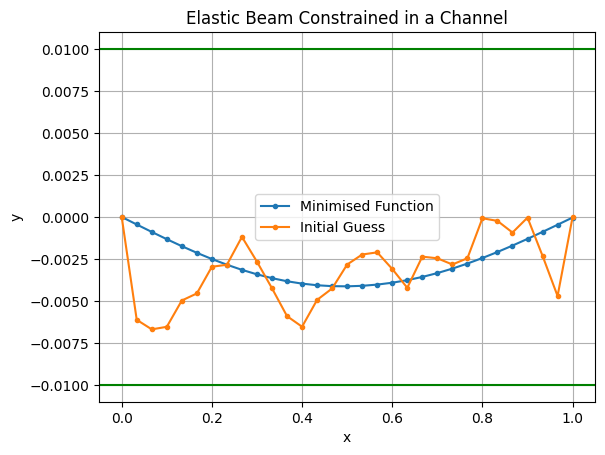

Energy of Minimised Function: 10.40581


In [80]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import basinhopping
from scipy.ndimage import uniform_filter1d

def generate_y(s, c):
    n = len(s)
    y = -c + 2 * c * np.random.rand(n-2)
    y_smooth = np.concatenate(([0], uniform_filter1d(y, size=5), [0]))

    return y_smooth

penalty_coeff1 = 0
penalty_coeff2 = 1e2
n = 30  # number of segments
p = 1e4  # dimensionless force
c = 0.01  # distance beween channel edge and zero line

s, h = np.linspace(0, 1, n+1, retstep=True)
# k = np.pi / 1
# theta0 = 0.02 * (np.cos(k*s) + 2 * np.cos(3*k*s))
y0 = generate_y(s, c)

# Energy functional
def energy_functional(y, p, h, c, penalty_coeff1, penalty_coeff2):
    n = len(y) - 1 
    diffs = np.diff(y) / h
    ddiffs = np.diff(diffs) / h
    v = 0.5 * np.sum(ddiffs**2) * h + p / (n+1)**2 * np.sum(np.cos(diffs)) * h
    
    penalty = penalty_coeff1*np.sum(np.maximum(0, y**2 - c**2)) + penalty_coeff2*(y[-1]**2+y[0]**2)

    return v + penalty

# Minimize energy
res = basinhopping(
    func=energy_functional,
    niter=20,
    T=20,
    x0=y0,
    minimizer_kwargs={
        "method": "L-BFGS-B",
        "args": (p, h, c, penalty_coeff1, penalty_coeff2),
        "bounds": [(-c, c) for _ in range(len(y0))]
    }
)

# Extract optimized theta
res_y = res.x

marker = 'none'
if n <= 30:
    marker = '.'

plt.figure()
plt.plot(s, res_y, marker=marker, label = "Minimised Function")
plt.plot(s, y0, marker=marker, label = "Initial Guess")

plt.axhline(y=c, color='g')
plt.axhline(y=-c, color='g')

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
# plt.axis("equal")
plt.title("Elastic Beam Constrained in a Channel")
plt.show()

print("Energy of Minimised Function:", round(res.fun,5))